In [1]:
#%%
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

#%%
os.chdir(r'/Users/albertoamerico/Documents/eusdfa/git/eu_sdfa_forecastingTools')
from utils import read_data
from utils import calculate_growth_rates
from utils import get_lagged_variables
from utils import fx_volatility
from utils import add_systemic_risk_dummy
from utils import add_missing_variables

In [1]:
target_1 = 'is_systemic_crisis'
target_2 = 'cpi_yoy'

In [3]:
file = './data/data_input_quarterly.csv'
country = 'DE'
df = read_data(file, country)
#%% Transform the data
yoy_variables = ["bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]
df = calculate_growth_rates(df, yoy_variables)
df = df.drop(yoy_variables, axis=1)
lag2_variables = [f"{col}_yoy" for col in ["bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]]
df = get_lagged_variables(df, 2, lag2_variables)
df = df.drop(lag2_variables, axis=1)
lag1_variables = [f"{col}_yoy" for col in ["cpi"]]
df = get_lagged_variables(df, 1, lag1_variables)
df = df.drop(lag1_variables, axis=1)
output_file = f'data_quarterly_{country}.csv'
df.to_csv(output_file, index = False)

#%% add summy variable
data = add_systemic_risk_dummy(output_file, 'dummy_final.csv', country)



/var/folders/sm/mrcnp4yd4blfyd443vxlzhsc0000gn/T/ipykernel_23084/2035192064.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_de['date'] = pd.to_datetime(dummy_de['date.1'])


In [ ]:
data_ea = pd.read_csv('./data/data_input_quarterly.csv')
cols2add = ['date','policyRate', 'EAtermSpread']
data_ea = data_ea[cols2add][data_ea['iso2']=='EA']
data_ea['date'] = pd.PeriodIndex(data_ea['date'], freq= 'Q').to_timestamp()

data_us = pd.read_csv('./data/data_input_quarterly.csv')
cols2add = ['date','policyRate', 'UStermSpread']
data_us = data_us[cols2add][data_us['iso2']=='US']
data_us['date'] = pd.PeriodIndex(data_us['date'], freq= 'Q').to_timestamp()

data.index = data['date']
data_ea.index = data_ea['date']
data_us.index = data_us['date']

data['policyRate'] = data['policyRate'].fillna(data_ea['policyRate'])
data['EAtermspread'] = data_ea['EAtermSpread']
data['USpolicyRate'] = data_us['policyRate']
data['UStermSpread'] = data_us['UStermSpread']

data.index = data['date']
data.drop('date', axis=1, inplace = True)

cols2reg = ['policyRate', 'resPropPrice', 'cpi_yoy', 'fx', 'financialStressIndex', 
'bankCreditPnfs_growthRate','totalCreditPnfsLCY_growthRate', 'totalCreditPnfs2GDP_growthRate',
 'fx_std', 'is_systemic_crisis', 'EAtermspread', 'USpolicyRate', 'UStermSpread']


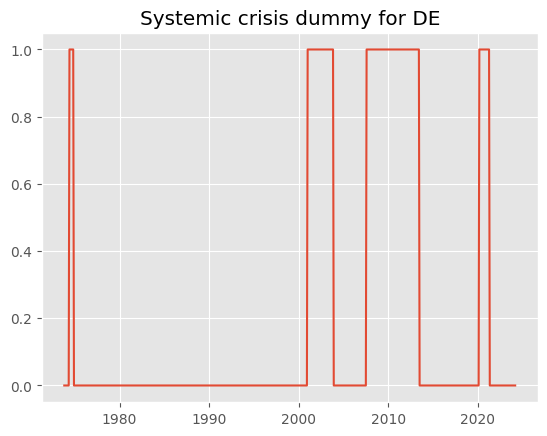

In [4]:
plt.plot(dummy_cc['is_systemic_crisis'])
plt.title(f'Systemic crisis dummy for {country}')
plt.show()

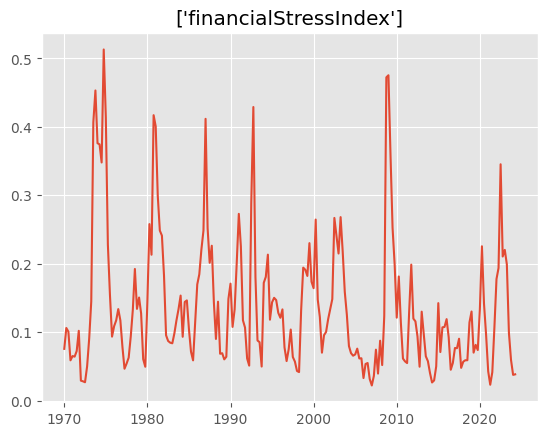

In [6]:
plt.plot(data['financialStressIndex'])
plt.title(['financialStressIndex'])
plt.show()

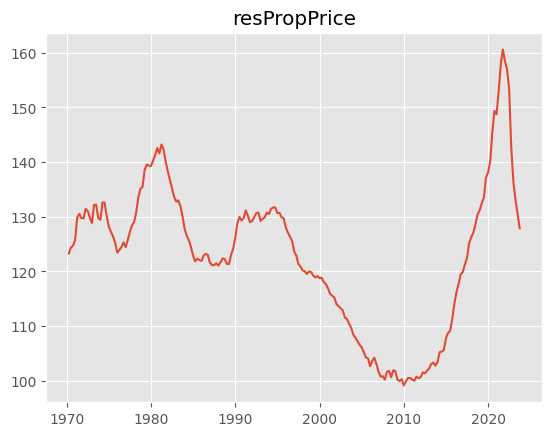

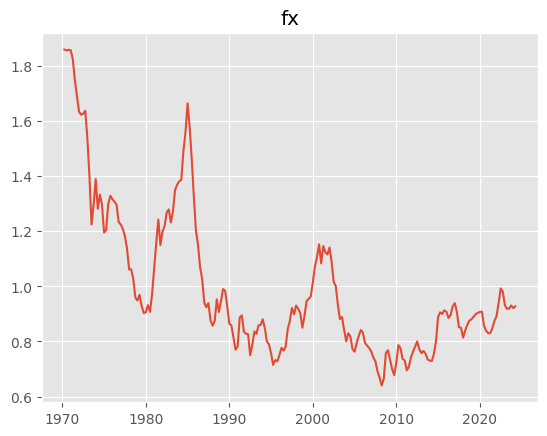

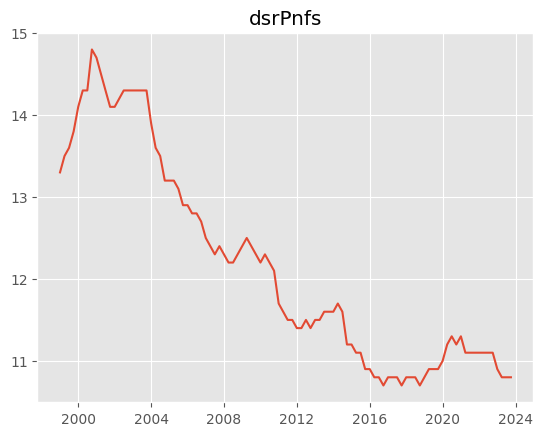

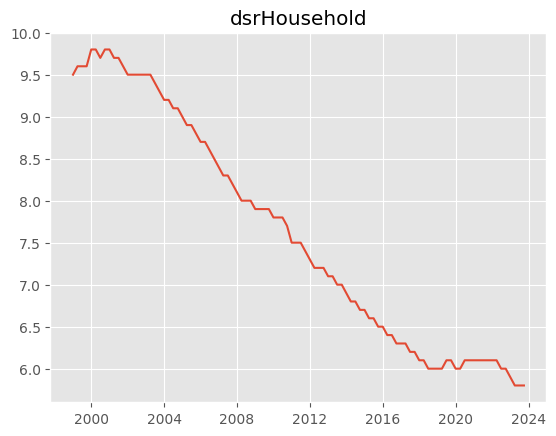

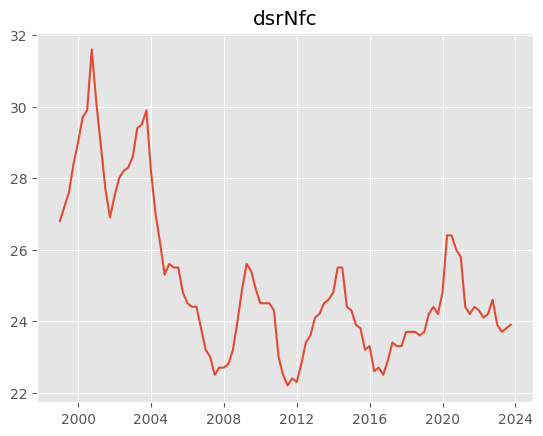

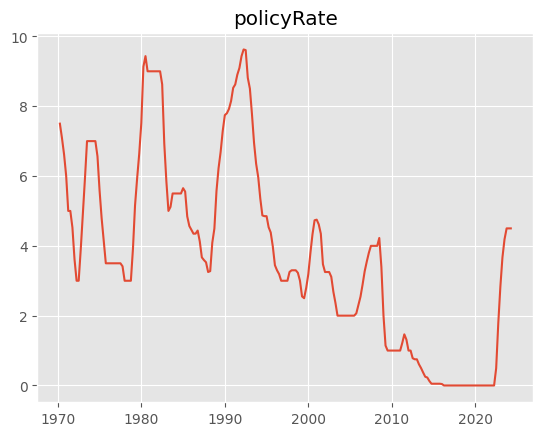

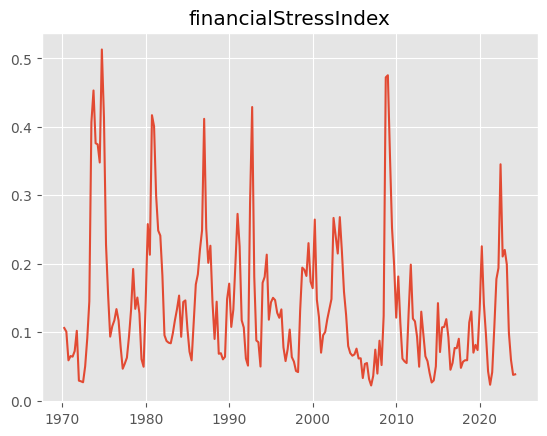

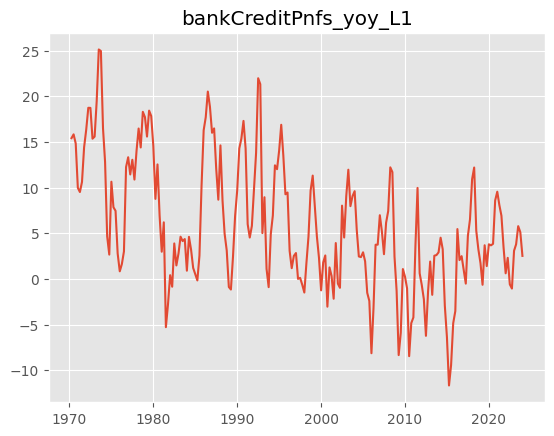

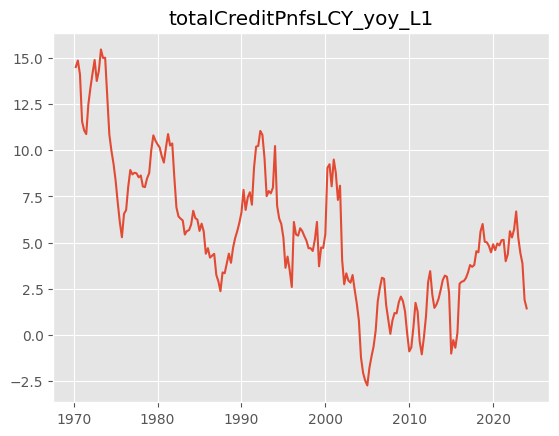

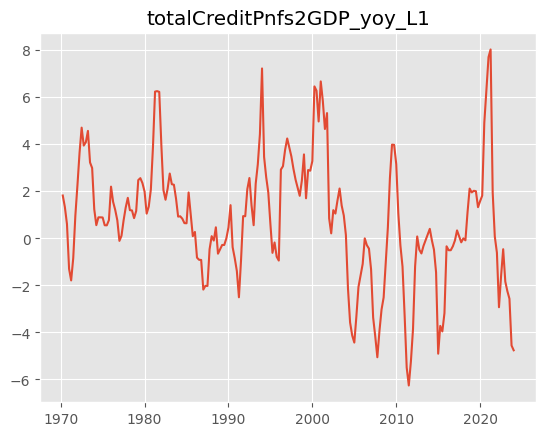

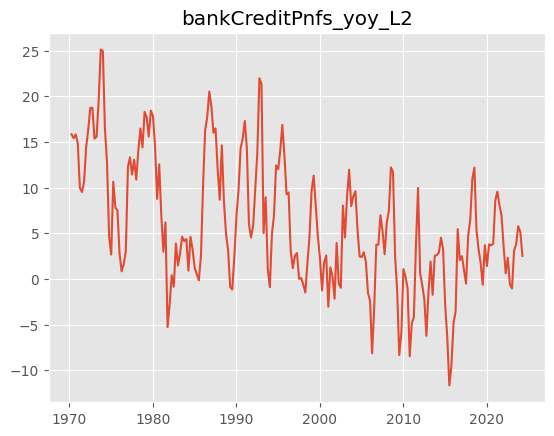

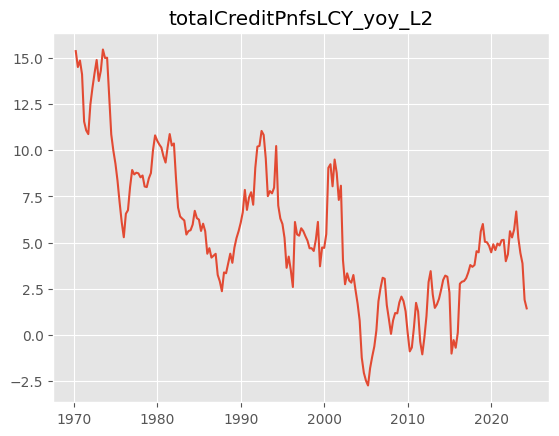

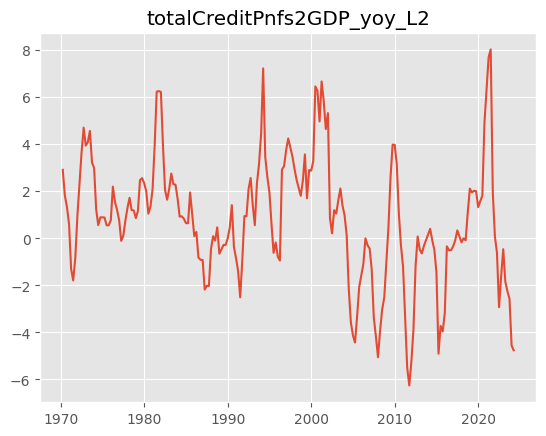

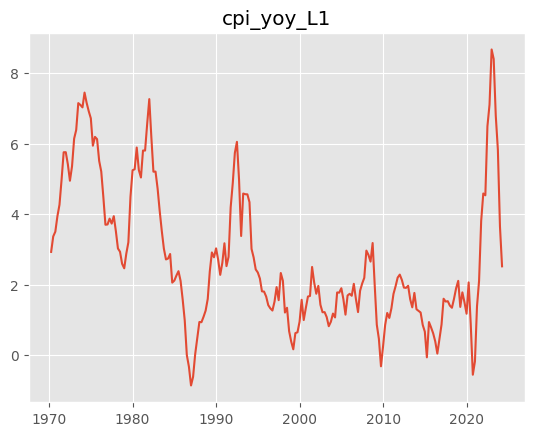

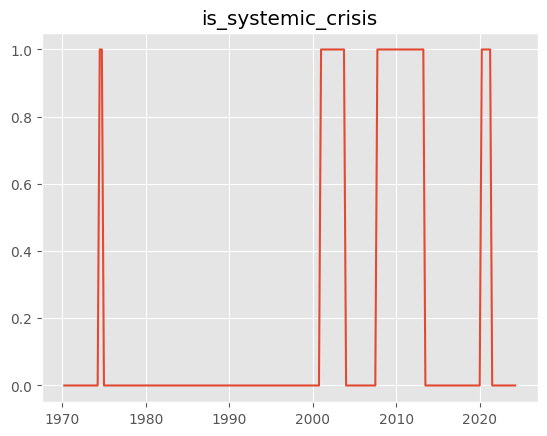

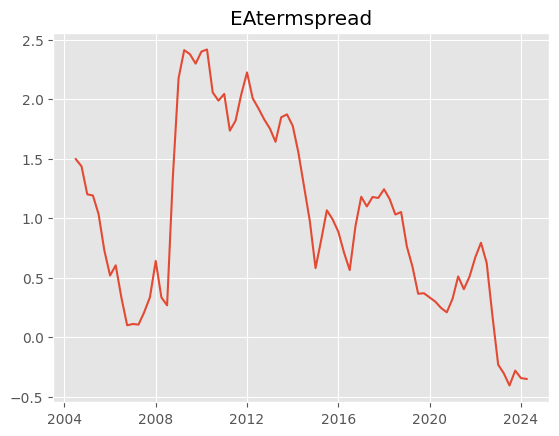

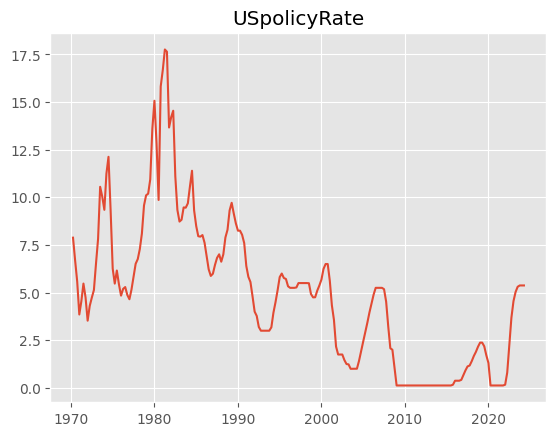

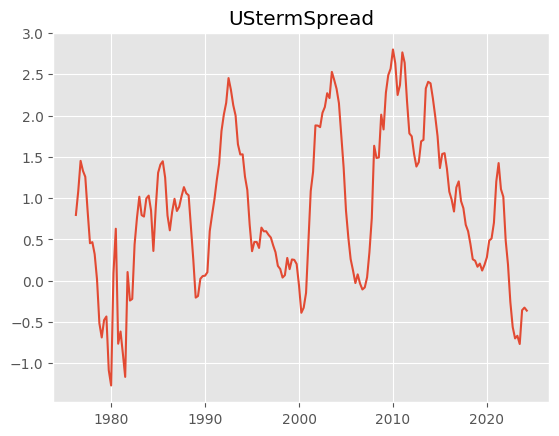

In [7]:
for col in data.loc[data[data.index>'1970'].index, ~data.columns.isin(list(data.filter(regex = 'lag').columns))]:
    plt.plot(data[col][data.index>'1970'])
    plt.title(col)
    plt.show()